In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import math

## recherche water question w6 -w11

année 2018 seulement


In [33]:
data_disclosing = pd.read_csv('../raw_data/2018_Corporates_Disclosing_to_CDP_Water_Security.csv')
full_water = pd.read_csv('../raw_data/2018_Full_Water_Security_Dataset.csv')

In [34]:
full_water

,account_number,organization,survey_year,response_received_date,accounting_period_to,ors_response_id,submission_date,page_name,module_name,question_number,question_unique_reference,column_number,column_name,table_columns_unique_reference,row_number,row_name,data_point_name,data_point_id,response_value,comments
0,19582,Johnson Controls International PLC,2018,2018-08-29T00:00:00Z,NaN,33625,2018-09-11T03:16:09Z,W3.3b,W3. Procedures,W3.3b,Which of the following contextual issues are c...,1.0,W3.3b_C1Relevance & inclusion,W3.3b_c1-Relevance & inclusion,6,Status of ecosystems and habitats,W3.3b_C1_Which of the following contextual iss...,1323,"Relevant, always included",NaN
1,19582,Johnson Controls International PLC,2018,2018-08-29T00:00:00Z,NaN,33625,2018-09-11T03:16:09Z,W3.3b,W3. Procedures,W3.3b,Which of the following contextual issues are c...,1.0,W3.3b_C1Relevance & inclusion,W3.3b_c1-Relevance & inclusion,8,"Other contextual issues, please specify",W3.3b_C1_Which of the following contextual iss...,1323,"Relevant, always included",NaN
2,19582,Johnson Controls International PLC,2018,2018-08-29T00:00:00Z,NaN,33625,2018-09-11T03:16:09Z,W3.3c,W3. Procedures,W3.3c,Which of the following stakeholders are consid...,2.0,W3.3c_C2Please explain,W3.3c_c2-Please explain,6,Other water users at a basin/catchment level,W3.3c_C2_Which of the following stakeholders a...,1327,We routinely communicate and collaborate with ...,NaN
3,19582,Johnson Controls International PLC,2018,2018-08-29T00:00:00Z,NaN,33625,2018-09-11T03:16:09Z,W3.3c,W3. Procedures,W3.3c,Which of the following stakeholders are consid...,2.0,W3.3c_C2Please explain,W3.3c_c2-Please explain,8,River basin management authorities,W3.3c_C2_Which of the following stakeholders a...,1327,"Where applicable, we engage with river basin m...",NaN
4,19582,Johnson Controls International PLC,2018,2018-08-29T00:00:00Z,NaN,33625,2018-09-11T03:16:09Z,W3.3c,W3. Procedures,W3.3c,Which of the following stakeholders are consid...,2.0,W3.3c_C2Please explain,W3.3c_c2-Please explain,10,Suppliers,W3.3c_C2_Which of the following stakeholders a...,1327,"We survey, audit, and maintain open communicat...",NaN
5,19582,Johnson Controls International PLC,2018,2018-08-29T00:00:00Z,NaN,33625,2018-09-11T03:16:09Z,W4.3a,W4. Risks and opportunities,W4.3a,Provide details of opportunities currently bei...,1.0,W4.3a_C1Type of opportunity,W4.3a_c1-Type of opportunity,4,NaN,W4.3a_C1_Provide details of opportunities curr...,8132,Markets,NaN
6,19582,Johnson Controls International PLC,2018,2018-08-29T00:00:00Z,NaN,33625,2018-09-11T03:16:09Z,W0.2,W0. Introduction,W0.2,State the start and end date of the year for w...,1.0,W0.2_C1Start date,W0.2_c1-Start date,1,Reporting year,W0.2_C1_State the start and end date of the ye...,1262,2016-10-01,NaN
7,19582,Johnson Controls International PLC,2018,2018-08-29T00:00:00Z,NaN,33625,2018-09-11T03:16:09Z,W0.2,W0. Introduction,W0.2,State the start and end date of the year for w...,2.0,W0.2_C2End date,W0.2_c2-End date,1,Reporting year,W0.2_C2_State the start and end date of the ye...,1263,2017-09-30,NaN
8,19582,Johnson Controls International PLC,2018,2018-08-29T00:00:00Z,NaN,33625,2018-09-11T03:16:09Z,W1.1,W1. Current state,W1.1,Rate the importance (current and future) of wa...,1.0,W1.1_C1Direct use importance rating,W1.1_c1-Direct use importance rating,1,Sufficient amounts of good quality freshwater ...,W1.1_C1_Rate the importance (current and futur...,1269,Important,NaN
9,19582,Johnson Controls International PLC,2018,2018-08-29T00:00:00Z,NaN,33625,2018-09-11T03:16:09Z,W1.1,W1. Current state,W1.1,Rate the importance (current and future) of wa...,3.0,W1.1_C3Please explain,W1.1_c3-Please explain,1,Sufficient amounts of good quality freshwater ...,W1.1_C3_Rate the importance (current and futur...,1271,"We use water for drinking, sanitary purposes a...",NaN


,account_number,organization,survey_year,response_received_date,accounting_period_to,ors_response_id,submission_date,page_name,module_name,question_number,question_unique_reference,column_number,column_name,table_columns_unique_reference,row_number,row_name,data_point_name,data_point_id,response_value,comments


In [5]:
full_water.nunique()

account_number                      209
organization                        209
survey_year                           1
response_received_date               48
accounting_period_to                  0
ors_response_id                     209
submission_date                     209
page_name                            54
module_name                           7
question_number                      54
question_unique_reference            54
column_number                        16
column_name                         211
table_columns_unique_reference      211
row_number                           46
row_name                             73
data_point_name                     211
data_point_id                       211
response_value                    18984
comments                            101
dtype: int64

In [7]:
full_water.isnull().sum()

account_number                        0
organization                          0
survey_year                           0
response_received_date                0
accounting_period_to              69818
ors_response_id                       0
submission_date                       0
page_name                             0
module_name                           0
question_number                       0
question_unique_reference             0
column_number                      2358
column_name                           0
table_columns_unique_reference        0
row_number                            0
row_name                          43084
data_point_name                       0
data_point_id                         0
response_value                     7350
comments                          69691
dtype: int64

In [8]:
f_w_dropped = full_water.drop(['accounting_period_to', 'ors_response_id','survey_year','comments','submission_date','response_received_date'], axis=1)

In [100]:
f_w_dropped

,account_number,organization,page_name,module_name,question_number,question_unique_reference,column_number,column_name,table_columns_unique_reference,row_number,row_name,data_point_name,data_point_id,response_value
0,19582,Johnson Controls International PLC,W3.3b,W3. Procedures,W3.3b,Which of the following contextual issues are c...,1.0,W3.3b_C1Relevance & inclusion,W3.3b_c1-Relevance & inclusion,6,Status of ecosystems and habitats,W3.3b_C1_Which of the following contextual iss...,1323,"Relevant, always included"
1,19582,Johnson Controls International PLC,W3.3b,W3. Procedures,W3.3b,Which of the following contextual issues are c...,1.0,W3.3b_C1Relevance & inclusion,W3.3b_c1-Relevance & inclusion,8,"Other contextual issues, please specify",W3.3b_C1_Which of the following contextual iss...,1323,"Relevant, always included"
2,19582,Johnson Controls International PLC,W3.3c,W3. Procedures,W3.3c,Which of the following stakeholders are consid...,2.0,W3.3c_C2Please explain,W3.3c_c2-Please explain,6,Other water users at a basin/catchment level,W3.3c_C2_Which of the following stakeholders a...,1327,We routinely communicate and collaborate with ...
3,19582,Johnson Controls International PLC,W3.3c,W3. Procedures,W3.3c,Which of the following stakeholders are consid...,2.0,W3.3c_C2Please explain,W3.3c_c2-Please explain,8,River basin management authorities,W3.3c_C2_Which of the following stakeholders a...,1327,"Where applicable, we engage with river basin m..."
4,19582,Johnson Controls International PLC,W3.3c,W3. Procedures,W3.3c,Which of the following stakeholders are consid...,2.0,W3.3c_C2Please explain,W3.3c_c2-Please explain,10,Suppliers,W3.3c_C2_Which of the following stakeholders a...,1327,"We survey, audit, and maintain open communicat..."
5,19582,Johnson Controls International PLC,W4.3a,W4. Risks and opportunities,W4.3a,Provide details of opportunities currently bei...,1.0,W4.3a_C1Type of opportunity,W4.3a_c1-Type of opportunity,4,NaN,W4.3a_C1_Provide details of opportunities curr...,8132,Markets
6,19582,Johnson Controls International PLC,W0.2,W0. Introduction,W0.2,State the start and end date of the year for w...,1.0,W0.2_C1Start date,W0.2_c1-Start date,1,Reporting year,W0.2_C1_State the start and end date of the ye...,1262,2016-10-01
7,19582,Johnson Controls International PLC,W0.2,W0. Introduction,W0.2,State the start and end date of the year for w...,2.0,W0.2_C2End date,W0.2_c2-End date,1,Reporting year,W0.2_C2_State the start and end date of the ye...,1263,2017-09-30
8,19582,Johnson Controls International PLC,W1.1,W1. Current state,W1.1,Rate the importance (current and future) of wa...,1.0,W1.1_C1Direct use importance rating,W1.1_c1-Direct use importance rating,1,Sufficient amounts of good quality freshwater ...,W1.1_C1_Rate the importance (current and futur...,1269,Important
9,19582,Johnson Controls International PLC,W1.1,W1. Current state,W1.1,Rate the importance (current and future) of wa...,3.0,W1.1_C3Please explain,W1.1_c3-Please explain,1,Sufficient amounts of good quality freshwater ...,W1.1_C3_Rate the importance (current and futur...,1271,"We use water for drinking, sanitary purposes a..."


selection de W6.1

In [171]:
W6_1 = f_w_dropped[f_w_dropped['question_number'] == 6.1]


In [172]:
W6_1

,account_number,organization,page_name,module_name,question_number,question_unique_reference,column_number,column_name,table_columns_unique_reference,row_number,row_name,data_point_name,data_point_id,response_value


In [168]:
W6_1.isnull().sum()

account_number                       0
organization                         0
page_name                            0
module_name                          0
question_number                      0
question_unique_reference            0
column_number                      196
column_name                          0
table_columns_unique_reference       0
row_number                           0
row_name                          1076
data_point_name                      0
data_point_id                        0
response_value                      14
dtype: int64

null w5=3196 / w0 =75 /w1 = 1122 / w3 = 1162/  w4 = 1483 / w8 = 298 /w9 =14

In [137]:
f_w20 = pd.read_csv('../raw_data/2020_Full_Water_Security_Dataset.csv',low_memory= False)

In [138]:
f_w20.nunique()

account_number                      295
organization                        295
survey_year                           1
response_received_date              295
accounting_period_to                  0
ors_response_id                     295
submission_date                     295
page_name                            48
module_name                           6
question_number                      48
question_unique_reference            48
column_number                        25
column_name                         202
table_columns_unique_reference      202
row_number                           33
row_name                             75
data_point_name                     194
data_point_id                       194
response_value                    22013
comments                              3
dtype: int64

In [52]:
w= f_w19[f_w19['question_number'] == 'W6.1']

In [53]:
w

,account_number,organization,survey_year,response_received_date,accounting_period_to,ors_response_id,submission_date,page_name,module_name,question_number,question_unique_reference,column_number,column_name,table_columns_unique_reference,row_number,row_name,data_point_name,data_point_id,response_value,comments


In [2]:
city_2018 =  pd.read_csv('../raw_data/2018_Full_Cities_Dataset.csv')

In [313]:
city_2018

,Questionnaire,Year Reported to CDP,Account Number,Organization,Country,CDP Region,Parent Section,Section,Question Number,Question Name,Column Number,Column Name,Row Number,Row Name,Response Answer,Comments,File Name,Last update
0,CDP Cities 2018,2018,3203,City of Chicago,United States of America,North America,Water,Wastewater,16.1,Please provide the percentage breakdown of the...,1,Percentage of wastewater collected,5,Other type of wastewater,NaN,NaN,NaN,24/06/2020 05:28:18 AM
1,CDP Cities 2018,2018,50555,City of Hamilton,Canada,North America,Climate Hazards,Climate Hazards,2.2a,Please list the most significant climate hazar...,5,Probability of hazard,4,NaN,Medium High,NaN,NaN,24/06/2020 05:28:18 AM
2,CDP Cities 2018,2018,50392,Prefeitura de Vitória,Brazil,Latin America,Emissions Reduction: City-wide,Emissions Reduction Actions : City-wide,8.4,What actions is your city taking to reduce emi...,1,Emissions reduction project activity,3,NaN,On-site renewable energy generation,NaN,NaN,24/06/2020 05:28:18 AM
3,CDP Cities 2018,2018,36522,Comune di Verbania,Italy,Europe,Strategy,Energy,9.0,Please indicate the energy mix of electricity ...,2,Gas,1,Energy consumption percentage,NaN,NaN,NaN,24/06/2020 05:28:18 AM
4,CDP Cities 2018,2018,35873,Municipality of Medellín,Colombia,Latin America,Climate Hazards,Climate Hazards,2.2a,Please list the most significant climate hazar...,3,Magnitude of impact,6,NaN,Serious,NaN,NaN,24/06/2020 05:28:18 AM
5,CDP Cities 2018,2018,36262,Comune di Genova,Italy,Europe,Emissions Reduction: City-wide,Emissions Reduction Actions : City-wide,8.4,What actions is your city taking to reduce emi...,1,Emissions reduction project activity,0,NaN,NaN,NaN,NaN,24/06/2020 05:28:18 AM
6,CDP Cities 2018,2018,31155,City of Buenos Aires,Argentina,Latin America,City Wide Emissions,Re-stating previous emissions inventories,7.13a,Please provide your city’s recalculated total ...,4,Previous emissions (metric tonnes CO2e),2,NaN,13434140,NaN,NaN,24/06/2020 05:28:18 AM
7,CDP Cities 2018,2018,59653,"City of Manhattan Beach, CA",United States of America,North America,City Wide Emissions,GHG Emissions Data,7.11,Please indicate if your city-wide emissions ha...,3,Please explain,1,Please explain,Improvement in electricity grid renewable ener...,NaN,NaN,24/06/2020 05:28:18 AM
8,CDP Cities 2018,2018,63999,"City of Miami Beach, FL",United States of America,North America,Climate Hazards,Climate Hazards,2.2a,Please list the most significant climate hazar...,6,Consequence of hazard,2,NaN,Medium,NaN,NaN,24/06/2020 05:28:18 AM
9,CDP Cities 2018,2018,35898,Greater Manchester,United Kingdom of Great Britain and Northern I...,Europe,Strategy,Transport,11.4,Please provide the total fleet size and number...,1,Number of private cars,4,Plug in hybrid,NaN,GM would have to collate this information expr...,NaN,24/06/2020 05:28:18 AM


In [309]:
qn=city_2018['Question Number'].unique()

In [314]:
qn

array(['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '1.0',
       '1.1', '1.10', '1.11', '1.12', '1.2', '1.3', '1.4', '1.4a', '1.5',
       '1.6', '1.7', '1.8', '1.9', '10.0', '10.1', '10.2', '10.3', '10.4',
       '10.5', '10.6', '10.7', '10.8', '10.9', '11.0', '11.1', '11.2',
       '11.3', '11.4', '11.5', '11.6', '11.6a', '12.0', '12.1', '13.0',
       '13.1', '14.0', '14.1', '14.2', '14.3', '14.4', '14.5', '14.6',
       '15.0', '15.1', '15.2', '15.3', '15.3a', '15.3b', '15.4', '16.0',
       '16.1', '16.2', '16.3', '16.3a', '2.0', '2.0a', '2.0b', '2.0c',
       '2.1', '2.1a', '2.2', '2.2a', '2.2b', '2.3', '2.4', '3.0', '3.0a',
       '3.1', '3.1a', '3.1b', '3.2', '3.2a', '3.3', '3.4', '3.5', '3.6',
       '3.7', '3.8', '3.9', '4.0', '4.0a', '4.0b', '5.0', '5.0a', '5.0b',
       '5.1', '5.10', '5.1a', '5.2', '5.3', '5.4', '5.5', '5.6', '5.7',
       '5.8', '5.9', '6.0', '6.1', '6.10', '6.10a', '6.10b', '6.2', '6.3',
       '6.4', '6.5', '6.6', '6.7', '6.8', '6.8a', '6.8b

In [4]:
city_2018.isnull().sum()

Questionnaire                0
Year Reported to CDP         0
Account Number               0
Organization                 0
Country                      0
CDP Region                   0
Parent Section            3918
Section                      0
Question Number              0
Question Name                0
Column Number                0
Column Name              16567
Row Number                   0
Row Name                118723
Response Answer          59411
Comments                177929
File Name               186007
Last update                  0
dtype: int64

In [5]:
city_2018.nunique()

Questionnaire               1
Year Reported to CDP        1
Account Number            488
Organization              488
Country                    80
CDP Region                  8
Parent Section             15
Section                    37
Question Number           169
Question Name             167
Column Number              15
Column Name               236
Row Number                 66
Row Name                  101
Response Answer         34630
Comments                 1045
File Name                 744
Last update                 1
dtype: int64

In [43]:
arr = ['1.4','2.0','2.1','3.0','3.1','3.2','5.1','6.0','6.10','7.0','7.3','7.12','8.0','8.2','8.3','9.2','9.3']

In [196]:
r1_4= city_2018[city_2018['Question Number'] == '1.4']
r2_0 =city_2018[city_2018['Question Number'] == '2.0']
r2_1 =city_2018[city_2018['Question Number'] == '2.1']
r3_0 =city_2018[city_2018['Question Number'] == '3.0']
r3_1=city_2018[city_2018['Question Number'] == '3.1']
r3_2 =city_2018[city_2018['Question Number'] == '3.2']
r5_1 =city_2018[city_2018['Question Number'] == '5.1']
r6_0 = city_2018[city_2018['Question Number'] == '6.0']
r6_10 = city_2018[city_2018['Question Number'] == '6.10']


In [7]:
data_r = []
for i in arr:
    data_r.append(city_2018[city_2018['Question Number'] == i])


In [8]:
data_r[16]

,Questionnaire,Year Reported to CDP,Account Number,Organization,Country,CDP Region,Parent Section,Section,Question Number,Question Name,Column Number,Column Name,Row Number,Row Name,Response Answer,Comments,File Name,Last update
16,CDP Cities 2018,2018,55415,"City of Columbia, SC",United States of America,North America,Strategy,Energy,9.3,Does your city have an agreement to purchase a...,0,NaN,0,NaN,No,NaN,NaN,24/06/2020 05:28:18 AM
151,CDP Cities 2018,2018,60392,Municipalidad de San Isidro (Lima),Peru,Latin America,Strategy,Energy,9.3,Does your city have an agreement to purchase a...,0,NaN,0,NaN,No,NaN,NaN,24/06/2020 05:28:18 AM
355,CDP Cities 2018,2018,50557,City of Norfolk,United States of America,North America,Strategy,Energy,9.3,Does your city have an agreement to purchase a...,0,NaN,0,NaN,No,NaN,NaN,24/06/2020 05:28:18 AM
1296,CDP Cities 2018,2018,58357,City of West Hollywood,United States of America,North America,Strategy,Energy,9.3,Does your city have an agreement to purchase a...,0,NaN,0,NaN,In progress,NaN,NaN,24/06/2020 05:28:18 AM
1601,CDP Cities 2018,2018,50794,Prefeitura Municipal de Caieiras,Brazil,Latin America,Strategy,Energy,9.3,Does your city have an agreement to purchase a...,0,NaN,0,NaN,No,NaN,NaN,24/06/2020 05:28:18 AM
1672,CDP Cities 2018,2018,73240,Tuzla Municipality,Turkey,Europe,Strategy,Energy,9.3,Does your city have an agreement to purchase a...,0,NaN,0,NaN,NaN,NaN,NaN,24/06/2020 05:28:18 AM
1778,CDP Cities 2018,2018,60104,Cambridge City Council,United Kingdom of Great Britain and Northern I...,Europe,Strategy,Energy,9.3,Does your city have an agreement to purchase a...,0,NaN,0,NaN,No,NaN,NaN,24/06/2020 05:28:18 AM
1982,CDP Cities 2018,2018,54128,City of Reno,United States of America,North America,Strategy,Energy,9.3,Does your city have an agreement to purchase a...,0,NaN,0,NaN,Yes,NaN,NaN,24/06/2020 05:28:18 AM
2441,CDP Cities 2018,2018,59987,Hutt City Council,New Zealand,Southeast Asia and Oceania,Strategy,Energy,9.3,Does your city have an agreement to purchase a...,0,NaN,0,NaN,No,NaN,NaN,24/06/2020 05:28:18 AM
2592,CDP Cities 2018,2018,31185,City of Warsaw,Poland,Europe,Strategy,Energy,9.3,Does your city have an agreement to purchase a...,0,NaN,0,NaN,No,NaN,NaN,24/06/2020 05:28:18 AM


In [9]:
new_df = pd.concat(data_r)

In [10]:
new_df

,Questionnaire,Year Reported to CDP,Account Number,Organization,Country,CDP Region,Parent Section,Section,Question Number,Question Name,Column Number,Column Name,Row Number,Row Name,Response Answer,Comments,File Name,Last update
105,CDP Cities 2018,2018,35864,Ekurhuleni Metropolitan Municipality,South Africa,Africa,Governance and Data Management,Governance,1.4,Does your city incorporate sustainability goal...,0,NaN,0,NaN,Yes,NaN,NaN,24/06/2020 05:28:18 AM
714,CDP Cities 2018,2018,54078,City of Hayward,United States of America,North America,Governance and Data Management,Governance,1.4,Does your city incorporate sustainability goal...,0,NaN,0,NaN,Yes,NaN,NaN,24/06/2020 05:28:18 AM
1041,CDP Cities 2018,2018,60371,Alcaldía de Leticia,Colombia,Latin America,Governance and Data Management,Governance,1.4,Does your city incorporate sustainability goal...,0,NaN,0,NaN,No,NaN,NaN,24/06/2020 05:28:18 AM
1114,CDP Cities 2018,2018,50578,City of Windsor,Canada,North America,Governance and Data Management,Governance,1.4,Does your city incorporate sustainability goal...,0,NaN,0,NaN,Yes,NaN,NaN,24/06/2020 05:28:18 AM
1344,CDP Cities 2018,2018,60140,City of Nakuru,Kenya,Africa,Governance and Data Management,Governance,1.4,Does your city incorporate sustainability goal...,0,NaN,0,NaN,Yes,NaN,NaN,24/06/2020 05:28:18 AM
3506,CDP Cities 2018,2018,54575,Vhembe District Municipality,South Africa,Africa,Governance and Data Management,Governance,1.4,Does your city incorporate sustainability goal...,0,NaN,0,NaN,NaN,NaN,NaN,24/06/2020 05:28:18 AM
3517,CDP Cities 2018,2018,58424,Gdańsk,Poland,Europe,Governance and Data Management,Governance,1.4,Does your city incorporate sustainability goal...,0,NaN,0,NaN,Yes,NaN,NaN,24/06/2020 05:28:18 AM
4636,CDP Cities 2018,2018,59538,City of Mississauga,Canada,North America,Governance and Data Management,Governance,1.4,Does your city incorporate sustainability goal...,0,NaN,0,NaN,In progress,NaN,NaN,24/06/2020 05:28:18 AM
5205,CDP Cities 2018,2018,58627,"City of Alton, IL",United States of America,North America,Governance and Data Management,Governance,1.4,Does your city incorporate sustainability goal...,0,NaN,0,NaN,No,NaN,NaN,24/06/2020 05:28:18 AM
5348,CDP Cities 2018,2018,3203,City of Chicago,United States of America,North America,Governance and Data Management,Governance,1.4,Does your city incorporate sustainability goal...,0,NaN,0,NaN,Yes,NaN,NaN,24/06/2020 05:28:18 AM


In [11]:
new_df.isnull().sum()

Questionnaire              0
Year Reported to CDP       0
Account Number             0
Organization               0
Country                    0
CDP Region                 0
Parent Section           468
Section                    0
Question Number            0
Question Name              0
Column Number              0
Column Name             6971
Row Number                 0
Row Name                6971
Response Answer          726
Comments                6863
File Name               6971
Last update                0
dtype: int64

In [12]:
coldrop = ['Parent Section','Column Name','Row Name','Comments','File Name','Last update','Questionnaire','Year Reported to CDP','Column Number','Row Number']

In [13]:
df_clean = new_df.drop(coldrop, axis=1)

In [14]:
df_clean.isnull().sum()

Account Number       0
Organization         0
Country              0
CDP Region           0
Section              0
Question Number      0
Question Name        0
Response Answer    726
dtype: int64

In [15]:
def note(x):
    if x == "Yes":
        return 1
    elif x == "No":
        return 0
    elif x =="In progress":
        return 0.5
    elif x =="Intending to undertake in future":
        return 0.25
    elif x == "Not intending to undertake":
        return 0
    elif x == "Do not know":
        return 0
    else:
        return 0
    


In [16]:
df_clean['note'] = df_clean['Response Answer'].apply(note)

In [17]:
df_clean

,Account Number,Organization,Country,CDP Region,Section,Question Number,Question Name,Response Answer,note
105,35864,Ekurhuleni Metropolitan Municipality,South Africa,Africa,Governance,1.4,Does your city incorporate sustainability goal...,Yes,1.00
714,54078,City of Hayward,United States of America,North America,Governance,1.4,Does your city incorporate sustainability goal...,Yes,1.00
1041,60371,Alcaldía de Leticia,Colombia,Latin America,Governance,1.4,Does your city incorporate sustainability goal...,No,0.00
1114,50578,City of Windsor,Canada,North America,Governance,1.4,Does your city incorporate sustainability goal...,Yes,1.00
1344,60140,City of Nakuru,Kenya,Africa,Governance,1.4,Does your city incorporate sustainability goal...,Yes,1.00
3506,54575,Vhembe District Municipality,South Africa,Africa,Governance,1.4,Does your city incorporate sustainability goal...,NaN,0.00
3517,58424,Gdańsk,Poland,Europe,Governance,1.4,Does your city incorporate sustainability goal...,Yes,1.00
4636,59538,City of Mississauga,Canada,North America,Governance,1.4,Does your city incorporate sustainability goal...,In progress,0.50
5205,58627,"City of Alton, IL",United States of America,North America,Governance,1.4,Does your city incorporate sustainability goal...,No,0.00
5348,3203,City of Chicago,United States of America,North America,Governance,1.4,Does your city incorporate sustainability goal...,Yes,1.00


In [18]:
df_clean.groupby(['Country','Organization']).sum()

Account Number  \
Country                          Organization                                                         
Argentina                        City of Buenos Aires                                        498480   
                                 Ciudad de Mendoza                                           805712   
                                 Comuna de Ataliva                                          9977196   
                                 Municipalidad de Córdoba                                    755565   
                                 Municipalidad de General Alvear (Mendoza)                  1047510   
                                 Municipalidad de Rio Grande                                 906285   
                                 Municipalidad de San Isidro (Argentina)                     906240   
                                 Municipalidad de Vicente López                              664452   
Australia                        Byron Shire Council                                         936688   
                                 Canberra                                                    746776   
                                 City of Adelaide                                            552160   
                                 City of Hobart                                              905318   
                                 City of Melbourne                                           528853   
                                 City of Perth                                               659010   
                                 City of Sydney                                              528938   
                                 Wollongong City Council                                     759542   
Bangladesh                       Dhaka City                                                  660166   
Bolivia (Plurinational State of) Gobierno Autónomo Municipal de Tarija                       785122   
Brazil                           CIOESTE                                                   11645676   
                                 City of Goiânia                                             505476   
                                 Municipality of Belo Horizonte                              537720   
                                 Municipality of Belém                                       432492   
                                 Municipality of Campinas                                    430764   
                                 Municipality of Curitiba                                    498496   
                                 Municipality of Fortaleza                                   502110   
                                 Municipality of Porto Alegre                                538200   
                                 Municipality of Recife                                      538080   
                                 Município de Aparecida                                      542628   
                                 Prefeitura Municipal da Estância Turística de O...          655992   
                                 Prefeitura Municipal de Aparecida de Goiânia                656016   
...                                                                                             ...   
United States of America         City of South Bend, IN                                      826306   
                                 City of St Louis                                            601681   
                                 City of Tacoma                                              864416   
                                 City of Tempe, AZ                                           808815   
                                 City of Toledo                                              707910   
                                 City of West Hollywood                                      758641   
                                 City of West Palm Beach            

In [31]:
ville = df_clean.Organization.unique()
d= {'Organization':ville}

In [91]:
df = pd.DataFrame(data= d)
df1 = df

In [38]:
col = ['Organization','note']

In [35]:
t= df_clean[df_clean['Question Number']== '1.4']
t


,Account Number,Organization,Country,CDP Region,Section,Question Number,Question Name,Response Answer,note
105,35864,Ekurhuleni Metropolitan Municipality,South Africa,Africa,Governance,1.4,Does your city incorporate sustainability goal...,Yes,1.00
714,54078,City of Hayward,United States of America,North America,Governance,1.4,Does your city incorporate sustainability goal...,Yes,1.00
1041,60371,Alcaldía de Leticia,Colombia,Latin America,Governance,1.4,Does your city incorporate sustainability goal...,No,0.00
1114,50578,City of Windsor,Canada,North America,Governance,1.4,Does your city incorporate sustainability goal...,Yes,1.00
1344,60140,City of Nakuru,Kenya,Africa,Governance,1.4,Does your city incorporate sustainability goal...,Yes,1.00
3506,54575,Vhembe District Municipality,South Africa,Africa,Governance,1.4,Does your city incorporate sustainability goal...,NaN,0.00
3517,58424,Gdańsk,Poland,Europe,Governance,1.4,Does your city incorporate sustainability goal...,Yes,1.00
4636,59538,City of Mississauga,Canada,North America,Governance,1.4,Does your city incorporate sustainability goal...,In progress,0.50
5205,58627,"City of Alton, IL",United States of America,North America,Governance,1.4,Does your city incorporate sustainability goal...,No,0.00
5348,3203,City of Chicago,United States of America,North America,Governance,1.4,Does your city incorporate sustainability goal...,Yes,1.00


In [41]:
df1.merge(t[col], left_on='Organization', right_on='Organization', how='left')

,Organization,note
0,Ekurhuleni Metropolitan Municipality,1.00
1,City of Hayward,1.00
2,Alcaldía de Leticia,0.00
3,City of Windsor,1.00
4,City of Nakuru,1.00
5,Vhembe District Municipality,0.00
6,Gdańsk,1.00
7,City of Mississauga,0.50
8,"City of Alton, IL",0.00
9,City of Chicago,1.00


In [92]:
for i in arr:
    t= df_clean[df_clean['Question Number']== i]
    c=df1.merge(t[col], left_on='Organization', right_on='Organization', how='left')
    df1[i]=c['note']

In [100]:
df1

,Organization,1.4,2.0,2.1,3.0,3.1,3.2,5.1,6.0,6.10,7.0,7.3,7.12,8.0,8.2,8.3,9.2,9.3
0,Ekurhuleni Metropolitan Municipality,1.00,1.00,0.0,0.00,1.00,0.0,1.00,1.0,0.00,0.00,NaN,NaN,0.0,1.00,0.0,1.00,0.0
1,City of Hayward,1.00,1.00,1.0,1.00,1.00,1.0,1.00,0.0,NaN,1.00,1.0,0.0,1.0,1.00,0.0,0.00,1.0
2,Alcaldía de Leticia,0.00,0.25,NaN,0.25,0.00,NaN,1.00,0.0,NaN,0.00,NaN,NaN,0.0,0.00,0.0,0.00,0.0
3,City of Windsor,1.00,1.00,0.0,1.00,1.00,0.0,1.00,1.0,0.00,1.00,1.0,0.0,1.0,1.00,0.0,1.00,0.0
4,City of Nakuru,1.00,0.50,NaN,1.00,0.50,NaN,1.00,0.0,NaN,0.25,NaN,NaN,0.0,1.00,0.0,1.00,0.0
5,Vhembe District Municipality,0.00,1.00,0.0,0.50,0.50,NaN,0.50,0.5,NaN,0.50,NaN,NaN,0.0,0.50,0.0,0.00,0.0
6,Gdańsk,1.00,0.50,NaN,0.50,0.50,NaN,0.00,1.0,0.00,1.00,0.0,0.0,1.0,1.00,0.0,0.00,0.0
7,City of Mississauga,0.50,1.00,0.0,0.50,0.50,NaN,0.25,1.0,0.00,1.00,1.0,0.0,0.0,0.50,0.0,0.00,0.0
8,"City of Alton, IL",0.00,0.00,NaN,1.00,1.00,0.0,0.00,1.0,0.00,1.00,0.0,0.0,1.0,1.00,0.0,0.00,0.0
9,City of Chicago,1.00,1.00,1.0,1.00,1.00,1.0,1.00,0.0,NaN,1.00,1.0,0.0,0.0,1.00,0.0,1.00,1.0


In [119]:
df2=df1.copy()

In [120]:
df2

,Organization,1.4,2.0,2.1,3.0,3.1,3.2,5.1,6.0,6.10,7.0,7.3,7.12,8.0,8.2,8.3,9.2,9.3
0,Ekurhuleni Metropolitan Municipality,1.00,1.00,0.0,0.00,1.00,0.0,1.00,1.0,0.00,0.00,NaN,NaN,0.0,1.00,0.0,1.00,0.0
1,City of Hayward,1.00,1.00,1.0,1.00,1.00,1.0,1.00,0.0,NaN,1.00,1.0,0.0,1.0,1.00,0.0,0.00,1.0
2,Alcaldía de Leticia,0.00,0.25,NaN,0.25,0.00,NaN,1.00,0.0,NaN,0.00,NaN,NaN,0.0,0.00,0.0,0.00,0.0
3,City of Windsor,1.00,1.00,0.0,1.00,1.00,0.0,1.00,1.0,0.00,1.00,1.0,0.0,1.0,1.00,0.0,1.00,0.0
4,City of Nakuru,1.00,0.50,NaN,1.00,0.50,NaN,1.00,0.0,NaN,0.25,NaN,NaN,0.0,1.00,0.0,1.00,0.0
5,Vhembe District Municipality,0.00,1.00,0.0,0.50,0.50,NaN,0.50,0.5,NaN,0.50,NaN,NaN,0.0,0.50,0.0,0.00,0.0
6,Gdańsk,1.00,0.50,NaN,0.50,0.50,NaN,0.00,1.0,0.00,1.00,0.0,0.0,1.0,1.00,0.0,0.00,0.0
7,City of Mississauga,0.50,1.00,0.0,0.50,0.50,NaN,0.25,1.0,0.00,1.00,1.0,0.0,0.0,0.50,0.0,0.00,0.0
8,"City of Alton, IL",0.00,0.00,NaN,1.00,1.00,0.0,0.00,1.0,0.00,1.00,0.0,0.0,1.0,1.00,0.0,0.00,0.0
9,City of Chicago,1.00,1.00,1.0,1.00,1.00,1.0,1.00,0.0,NaN,1.00,1.0,0.0,0.0,1.00,0.0,1.00,1.0


In [121]:
def cleanan(x):
    if pd.isna(x):
        return 0
    else:
        return x

In [122]:
for i in arr:
    df2[i] = df2[i].apply(cleanan)
df2
    

,Organization,1.4,2.0,2.1,3.0,3.1,3.2,5.1,6.0,6.10,7.0,7.3,7.12,8.0,8.2,8.3,9.2,9.3
0,Ekurhuleni Metropolitan Municipality,1.00,1.00,0.0,0.00,1.00,0.0,1.00,1.0,0.00,0.00,0.0,0.0,0.0,1.00,0.0,1.00,0.0
1,City of Hayward,1.00,1.00,1.0,1.00,1.00,1.0,1.00,0.0,0.00,1.00,1.0,0.0,1.0,1.00,0.0,0.00,1.0
2,Alcaldía de Leticia,0.00,0.25,0.0,0.25,0.00,0.0,1.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0
3,City of Windsor,1.00,1.00,0.0,1.00,1.00,0.0,1.00,1.0,0.00,1.00,1.0,0.0,1.0,1.00,0.0,1.00,0.0
4,City of Nakuru,1.00,0.50,0.0,1.00,0.50,0.0,1.00,0.0,0.00,0.25,0.0,0.0,0.0,1.00,0.0,1.00,0.0
5,Vhembe District Municipality,0.00,1.00,0.0,0.50,0.50,0.0,0.50,0.5,0.00,0.50,0.0,0.0,0.0,0.50,0.0,0.00,0.0
6,Gdańsk,1.00,0.50,0.0,0.50,0.50,0.0,0.00,1.0,0.00,1.00,0.0,0.0,1.0,1.00,0.0,0.00,0.0
7,City of Mississauga,0.50,1.00,0.0,0.50,0.50,0.0,0.25,1.0,0.00,1.00,1.0,0.0,0.0,0.50,0.0,0.00,0.0
8,"City of Alton, IL",0.00,0.00,0.0,1.00,1.00,0.0,0.00,1.0,0.00,1.00,0.0,0.0,1.0,1.00,0.0,0.00,0.0
9,City of Chicago,1.00,1.00,1.0,1.00,1.00,1.0,1.00,0.0,0.00,1.00,1.0,0.0,0.0,1.00,0.0,1.00,1.0


In [124]:
dfk = df2.copy()
dfk

,Organization,1.4,2.0,2.1,3.0,3.1,3.2,5.1,6.0,6.10,7.0,7.3,7.12,8.0,8.2,8.3,9.2,9.3
0,Ekurhuleni Metropolitan Municipality,1.00,1.00,0.0,0.00,1.00,0.0,1.00,1.0,0.00,0.00,0.0,0.0,0.0,1.00,0.0,1.00,0.0
1,City of Hayward,1.00,1.00,1.0,1.00,1.00,1.0,1.00,0.0,0.00,1.00,1.0,0.0,1.0,1.00,0.0,0.00,1.0
2,Alcaldía de Leticia,0.00,0.25,0.0,0.25,0.00,0.0,1.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0
3,City of Windsor,1.00,1.00,0.0,1.00,1.00,0.0,1.00,1.0,0.00,1.00,1.0,0.0,1.0,1.00,0.0,1.00,0.0
4,City of Nakuru,1.00,0.50,0.0,1.00,0.50,0.0,1.00,0.0,0.00,0.25,0.0,0.0,0.0,1.00,0.0,1.00,0.0
5,Vhembe District Municipality,0.00,1.00,0.0,0.50,0.50,0.0,0.50,0.5,0.00,0.50,0.0,0.0,0.0,0.50,0.0,0.00,0.0
6,Gdańsk,1.00,0.50,0.0,0.50,0.50,0.0,0.00,1.0,0.00,1.00,0.0,0.0,1.0,1.00,0.0,0.00,0.0
7,City of Mississauga,0.50,1.00,0.0,0.50,0.50,0.0,0.25,1.0,0.00,1.00,1.0,0.0,0.0,0.50,0.0,0.00,0.0
8,"City of Alton, IL",0.00,0.00,0.0,1.00,1.00,0.0,0.00,1.0,0.00,1.00,0.0,0.0,1.0,1.00,0.0,0.00,0.0
9,City of Chicago,1.00,1.00,1.0,1.00,1.00,1.0,1.00,0.0,0.00,1.00,1.0,0.0,0.0,1.00,0.0,1.00,1.0


In [126]:
X=dfk[arr] 
X

,1.4,2.0,2.1,3.0,3.1,3.2,5.1,6.0,6.10,7.0,7.3,7.12,8.0,8.2,8.3,9.2,9.3
0,1.00,1.00,0.0,0.00,1.00,0.0,1.00,1.0,0.00,0.00,0.0,0.0,0.0,1.00,0.0,1.00,0.0
1,1.00,1.00,1.0,1.00,1.00,1.0,1.00,0.0,0.00,1.00,1.0,0.0,1.0,1.00,0.0,0.00,1.0
2,0.00,0.25,0.0,0.25,0.00,0.0,1.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0
3,1.00,1.00,0.0,1.00,1.00,0.0,1.00,1.0,0.00,1.00,1.0,0.0,1.0,1.00,0.0,1.00,0.0
4,1.00,0.50,0.0,1.00,0.50,0.0,1.00,0.0,0.00,0.25,0.0,0.0,0.0,1.00,0.0,1.00,0.0
5,0.00,1.00,0.0,0.50,0.50,0.0,0.50,0.5,0.00,0.50,0.0,0.0,0.0,0.50,0.0,0.00,0.0
6,1.00,0.50,0.0,0.50,0.50,0.0,0.00,1.0,0.00,1.00,0.0,0.0,1.0,1.00,0.0,0.00,0.0
7,0.50,1.00,0.0,0.50,0.50,0.0,0.25,1.0,0.00,1.00,1.0,0.0,0.0,0.50,0.0,0.00,0.0
8,0.00,0.00,0.0,1.00,1.00,0.0,0.00,1.0,0.00,1.00,0.0,0.0,1.0,1.00,0.0,0.00,0.0
9,1.00,1.00,1.0,1.00,1.00,1.0,1.00,0.0,0.00,1.00,1.0,0.0,0.0,1.00,0.0,1.00,1.0


In [127]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2,random_state=42)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [136]:
len(km.labels_)

488

In [131]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'k cluster number')

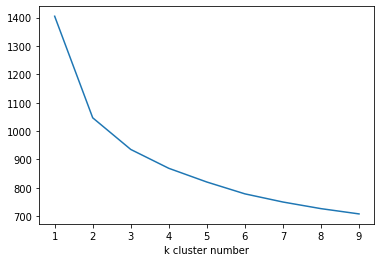

In [139]:
inertias=[]
ks = range(1,10)
for k in ks:
    km_test = KMeans(n_clusters=k).fit(X)
    inertias.append(km_test.inertia_)
plt.plot(ks, inertias)
plt.xlabel('k cluster number')

In [144]:
df_label = pd.DataFrame(data= d)

## test k mean = 3

In [149]:
km3 = KMeans(n_clusters=3,random_state=42)
km3.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [147]:
df_k3mean = df_label.copy()

In [150]:
df_k3mean['label']=km3.labels_

In [151]:
df_k3mean

,Organization,label
0,Ekurhuleni Metropolitan Municipality,2
1,City of Hayward,0
2,Alcaldía de Leticia,1
3,City of Windsor,2
4,City of Nakuru,2
5,Vhembe District Municipality,1
6,Gdańsk,2
7,City of Mississauga,2
8,"City of Alton, IL",2
9,City of Chicago,0


In [189]:
disclo = pd.read_csv('../raw_data/Cities_Disclosing_to_CDP_Data_Dictionary.csv')
disclo

,field,description,column _entries,example
0,Year Reported to CDP,Cities Disclosure cycle survey year.,2020,NaN
1,Account Number,The unique identifier given to every city orga...,49335,NaN
2,Organization,Name of the City organisation disclosing,Metropolitan Government of Nashville and David...,NaN
3,City,Name of the City the city organisation is disc...,Nashville,NaN
4,Country,Country of city,United States of America,NaN
5,CDP Region,CDP operation region City is located within,North America,NaN
6,Reporting Authority,CDP collects information on behalf of a number...,"C40,CDP Cities,ICLEI - Local Governments for S...",Includes Global Covenant of Mayors for Climate...
7,Access,Cities can submit CDP response in public statu...,public,NaN
8,First Time Discloser,Is the City disclosing for the first time to CDP,No,NaN
9,Population,Citiy population estimate,692587,NaN


In [158]:
geo = pd.read_csv('../raw_data/2018_Cities_Disclosing_to_CDP.csv')

In [162]:
local=['Organization','City Location']

In [164]:
mer=geo[local]

In [167]:
final_df=df_k3mean.merge(mer, how='inner', on='Organization')

In [221]:
final_df
final_df3 = final_df.copy()

In [222]:
final_df

,Organization,label,City Location
0,Ekurhuleni Metropolitan Municipality,2,POINT (28.3462 -26.1777)
1,City of Hayward,0,POINT (-122.081 37.6689)
2,Alcaldía de Leticia,1,POINT (-69.9406 -4.21528)
3,City of Windsor,2,POINT (-83.0364 42.3149)
4,City of Nakuru,2,POINT (36.08 -0.30309)
5,Vhembe District Municipality,1,POINT (29.974 -22.7695)
6,Gdańsk,2,POINT (18.6466 54.352)
7,City of Mississauga,2,POINT (43.589 -79.6441)
8,"City of Alton, IL",2,POINT (-90.1843 38.8906)
9,City of Chicago,0,POINT (-87.6298 41.8781)


In [223]:
final_df['City Location'][0]

'POINT (28.3462 -26.1777)'

In [224]:
var ='POINT (28.3462 -26.1777)'

In [225]:
def convertloca(x):
    lonlat= []
    res = x.strip('POINT () ')
    res = res.split()
    lonlat.append(float(res[1]))
    lonlat.append(float(res[0]))
    
    return lonlat

In [226]:
convertloca(var)

[-26.1777, 28.3462]

In [227]:
final_df3['City Location'] = final_df3['City Location'].apply(convertloca)

In [234]:
final_df3

,Organization,label,City Location
0,Ekurhuleni Metropolitan Municipality,2,"[-26.1777, 28.3462]"
1,City of Hayward,0,"[37.6689, -122.081]"
2,Alcaldía de Leticia,1,"[-4.21528, -69.9406]"
3,City of Windsor,2,"[42.3149, -83.0364]"
4,City of Nakuru,2,"[-0.30309, 36.08]"
5,Vhembe District Municipality,1,"[-22.7695, 29.974]"
6,Gdańsk,2,"[54.352, 18.6466]"
7,City of Mississauga,2,"[-79.6441, 43.589]"
8,"City of Alton, IL",2,"[38.8906, -90.1843]"
9,City of Chicago,0,"[41.8781, -87.6298]"


In [279]:
import folium


m = folium.Map(location=[45.5236, -122.6750])

In [274]:
def colorlabel(x):
    if x == 0:
        return 'green'
    elif x == 1:
        return 'blue'
    elif x == 2 :
        return 'red'
    elif x == 3:
        return 'purple'
    elif x == 4:
        return 'orange'
    elif x == 5:
        return "pink"
    elif x == 6:
        return 'beige'
    elif x == 7:
        return 'lightgreen'
    elif x == 8:
        return 'black'
    elif x == 9:
        return 'cadetblue'
        
    else:
        return 'yellow'

In [278]:
for i in final_df3.iterrows():
    # print(i[1][0])

SyntaxError: unexpected EOF while parsing (<ipython-input-278-89055f5bfd51>, line 2)

In [280]:
for i in final_df3.iterrows():
    couleur = colorlabel(i[1][1])
    
    
    #folium.Marker(
    folium.CircleMarker(
    
    location=i[1][2],
    popup=i[1][0],
    #icon=folium.Icon(color=couleur)
     
    radius=5,
    
    color=couleur,
    fill=True,
    fill_color='gray'   
        
    
    ).add_to(m)

In [ ]:
colors = [
    'red',
    'blue',
    'gray',
    'darkred',
    'lightred',
    'orange',
    'beige',
    'green',
    'darkgreen',
    'lightgreen',
    'darkblue',
    'lightblue',
    'purple',
    'darkpurple',
    'pink',
    'cadetblue',
    'lightgray',
    'black'
]

Kmean 3 map

In [281]:
m

<AxesSubplot:xlabel='label'>

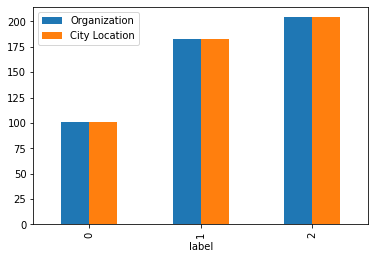

In [306]:
final_df3.groupby('label').count().plot(kind='bar')





## k mean = 2



In [240]:
km2 = KMeans(n_clusters=2,random_state=42)
km2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [241]:
df_k2mean = df_label.copy()
df_k2mean['label']=km2.labels_

In [316]:
km2.cluster_centers_

array([[0.88047809, 0.82669323, 0.37450199, 0.88446215, 0.71513944,
        0.38645418, 0.84063745, 0.78685259, 0.15936255, 0.91135458,
        0.66334661, 0.20717131, 0.73306773, 0.81573705, 0.        ,
        0.57370518, 0.33864542],
       [0.4778481 , 0.3649789 , 0.05907173, 0.51898734, 0.2521097 ,
        0.03375527, 0.44198312, 0.31012658, 0.01582278, 0.32489451,
        0.10337553, 0.02848101, 0.16877637, 0.24156118, 0.        ,
        0.16666667, 0.05485232]])

In [242]:
df_k2mean

,Organization,label
0,Ekurhuleni Metropolitan Municipality,0
1,City of Hayward,0
2,Alcaldía de Leticia,1
3,City of Windsor,0
4,City of Nakuru,1
5,Vhembe District Municipality,1
6,Gdańsk,0
7,City of Mississauga,0
8,"City of Alton, IL",1
9,City of Chicago,0


In [243]:
final_df2=df_k2mean.merge(mer, how='inner', on='Organization')

In [246]:
final_df2

,Organization,label,City Location
0,Ekurhuleni Metropolitan Municipality,0,"[-26.1777, 28.3462]"
1,City of Hayward,0,"[37.6689, -122.081]"
2,Alcaldía de Leticia,1,"[-4.21528, -69.9406]"
3,City of Windsor,0,"[42.3149, -83.0364]"
4,City of Nakuru,1,"[-0.30309, 36.08]"
5,Vhembe District Municipality,1,"[-22.7695, 29.974]"
6,Gdańsk,0,"[54.352, 18.6466]"
7,City of Mississauga,0,"[-79.6441, 43.589]"
8,"City of Alton, IL",1,"[38.8906, -90.1843]"
9,City of Chicago,0,"[41.8781, -87.6298]"


In [245]:
final_df2['City Location'] = final_df2['City Location'].apply(convertloca)

In [266]:
map2 = folium.Map(location=[45.5236, -122.6750])

In [267]:
for i in final_df2.iterrows():
    couleur = colorlabel(i[1][1])
    
    
    folium.CircleMarker(
    location=i[1][2],
    popup=i[1][0],
    
        
    
    radius=5,
    
    color=couleur,
    fill=True,
    fill_color='gray'  
    
        
    ).add_to(map2)

k mean 2 map

In [268]:
map2

<AxesSubplot:xlabel='label'>

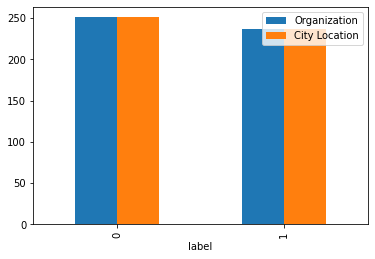

In [305]:
final_df2.groupby('label').count().plot(kind='bar')

## K mean = 10

In [269]:
km10 = KMeans(n_clusters=10,random_state=42)
km10.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [270]:
df_k10mean = df_label.copy()
df_k10mean['label']=km10.labels_

In [271]:
final_df10=df_k10mean.merge(mer, how='inner', on='Organization')

In [273]:
final_df10['City Location'] = final_df10['City Location'].apply(convertloca)

In [275]:
map10 = folium.Map(location=[45.5236, -122.6750])

for i in final_df10.iterrows():
    couleur = colorlabel(i[1][1])
    
    
    folium.CircleMarker(
    location=i[1][2],
    popup=i[1][0],
    
        
    
    radius=5,
    
    color=couleur,
    fill=True,
    fill_color='gray'  
    
        
    ).add_to(map10)

k mean 10 map

In [276]:
map10

<AxesSubplot:xlabel='label'>

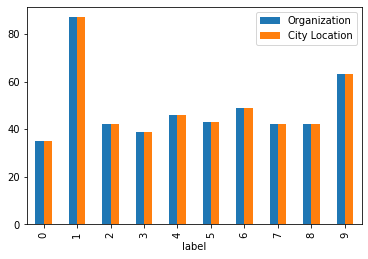

In [304]:
final_df10.groupby('label').count().plot(kind='bar')

In [303]:
final_df10

,Organization,label,City Location
0,Ekurhuleni Metropolitan Municipality,9,"[-26.1777, 28.3462]"
1,City of Hayward,3,"[37.6689, -122.081]"
2,Alcaldía de Leticia,1,"[-4.21528, -69.9406]"
3,City of Windsor,2,"[42.3149, -83.0364]"
4,City of Nakuru,9,"[-0.30309, 36.08]"
5,Vhembe District Municipality,7,"[-22.7695, 29.974]"
6,Gdańsk,5,"[54.352, 18.6466]"
7,City of Mississauga,4,"[-79.6441, 43.589]"
8,"City of Alton, IL",7,"[38.8906, -90.1843]"
9,City of Chicago,3,"[41.8781, -87.6298]"
